# SymPy Utilities

Package for symbolic computations, similar to Mathematica or maple.

Official page:
https://www.sympy.org/en/index.html

This notebook was made mainly after following the official tutorial:
https://docs.sympy.org/latest/tutorial/index.html#tutorial

Installation:
```bash
conda install sympy
```

Overview of concepts covered in this notebook:
1. Setup and Basics: Import, Printing, LaTeX.
2. Working with Symbols: Symbols, Expressions, Expansion, Factoring, Simplify, Equalities, Fractions.
3. Basic Operations: Substitution, Convert string to symbolic (sympify), Evaluate, Lambdify.
4. Calculus: Derivatives, Integrals, Limits, Series (Taylor Expansion).
5. Linear Algebra; Matrices & Operations, Determinant, Eigendecomposition.
6. Working with Equations: Solving, Plotting & Co.: Solving roots, Linear Systems, Nonlinear Systems, Plotting Functions, Solving Differential Equations.


## 1. Setup and Basics

Import, Printing, LaTeX.

In [23]:
# Better avoid the common
# from sympy import *
# because it has many modules...
import sympy as sp

In [27]:
# We can activate Unicode printing for nice symbols
sp.init_printing(use_unicode=False)

In [30]:
# Usually, python works with floating point variables
import math
math.sqrt(3)

In [32]:
# Sympy works with symbolic representations
sp.sqrt(3)

In [37]:
sp.sqrt(8)

In [39]:
# We can generate LaTeX strings!
sp.latex(sp.sqrt(8))

2 \sqrt{2}


## 2. Working with Symbols

Symbols, Expressions, Expansion, Factoring, Simplify, Equalities, Fractions.
Note: there are many more simplification operations not covered here: collect, cancel, trigonometric simplification, ...

In [44]:
# We need to declare symbols to define equations
x, y = sp.symbols('x y')

In [45]:
# Expressions are composed of symbols
expr = 3*x + 2*y + x

In [46]:
expr

In [48]:
# We can work with the expression and symbols
expr2 = (expr + 10 - x)*x
expr2

In [51]:
# Expand: Perform operations (multiply)
expanded = sp.expand(expr2)
expanded

In [52]:
# Factor
sp.factor(expanded)

In [60]:
# = is assignment
# == is boolean comparison (both sides  must be identical, equivalent does not suffice)
# Eq() can be used to create equatlities
# x + 1 = 4
sp.Eq(x + 1, 4)

In [61]:
# Simplify
a = (x + 1)**2
b = x**2 + 2*x + 1
sp.simplify(a - b)

In [62]:
# Equals
# We cannot use ==, because == checks whether both sides are identical (equivalent does not suffice)
a = sp.cos(x)**2 - sp.sin(x)**2
b = sp.cos(2*x)
a.equals(b)

True

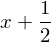

In [64]:
# Fractions: Use sp.Rational instead of /
x + sp.Rational(1,2)

In [179]:
# Sympy has also constants: sp.pi, sp.oo, ...
sp.pi

In [190]:
sp.pi.evalf()

## 3. Basic Operations

Substitution, Convert string to symbolic (sympify), Evaluate, Lambdify.

In [65]:
x, y, z = sp.symbols("x y z")

In [66]:
expr = sp.cos(x) + 1

In [67]:
# Substitutions: we can substitute
# - values for symbols: expression is evaluated with given value
# - symbols for symbols: symbols are changed
# - expressions for symbols: a symbol is replaced by its formula
expr.subs(x, y)

In [68]:
expr.subs(x, 0)

In [69]:
expr.subs(x, x*y)

In [70]:
# Convert strings to expressions
str_expr = "x**2 + 3*x - 1/2"

In [72]:
expr = sp.sympify(str_expr)

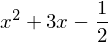

In [73]:
expr

In [74]:
expr.subs(x, 2)

In [76]:
# We can evaluate the floating point value of a symbolic representation
expr = sp.sqrt(8)
expr.evalf()

In [80]:
# Lambdify: Create a function with an expression;
# when we pass an array to that function, each element of the array is evaluated with the expression
import numpy as np
a = np.arange(10) 
expr = sp.sin(x)
f = sp.lambdify(x, expr, "numpy") 

In [79]:
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

## 4. Calculus

Derivatives, Integrals, Limits, Series (Taylor Expansion).

In [81]:
x, y, z = sp.symbols('x y z')

In [87]:
# Derivatives
sp.diff(sp.cos(x), x)

In [84]:
sp.diff(sp.exp(x**2), x)

In [94]:
# Several derivatives in chain: d/dx*d/dx*d/df´x
sp.diff(x**4, x, x, x)

In [95]:
# We can also create unevaluated derivatives with the same syntax as diff: Derivative()
expr = sp.Derivative(x**4, x, x, x)

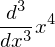

In [96]:
expr

In [98]:
# We can evaluate Derivatives with doit
expr.doit()

In [89]:
# Integrals
sp.integrate(sp.cos(x), x)

In [92]:
# Integrate between [a,b]: (symbol, a, b) = (integration_variable, lower_limit, upper_limit)
# Example: [0,inf]
# Inf is sp.oo, -Inf is -sp.oo
sp.integrate(sp.exp(-x), (x, 0, sp.oo))

In [93]:
# Double integrals
sp.integrate(sp.exp(-x**2 - y**2), (x, -sp.oo, sp.oo), (y, -sp.oo, sp.oo))

In [100]:
# Unevaluated integrals: Integral()
expr = sp.Integral(sp.log(x)**2, x)

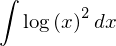

In [101]:
expr

In [102]:
# Evaluate Integral
expr.doit()

In [104]:
# Limits: x -> 0
sp.limit(sp.sin(x)/x, x, 0)

In [105]:
# Unevaluated limits: Limit()
expr = sp.Limit(sp.sin(x)/x, x, 0)

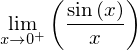

In [106]:
expr

In [108]:
# Evaluate unevaluated limits
expr.doit()

In [109]:
# Left & right limits:
sp.limit(1/x, x, 0, '+')

In [110]:
sp.limit(1/x, x, 0, '-')

In [111]:
# Series: Taylor Expansion
# Notation: f(x).series(x,x0,n)
expr = sp.exp(sp.sin(x))

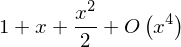

In [112]:
expr.series(x, 0, 4)

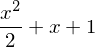

In [113]:
# We can also remove the error order term
expr.series(x, 0, 4).removeO()

## 5. Linear Algebra

Matrices & Operations, Determinant, Eigendecomposition.

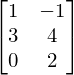

In [118]:
# Matrices defined in row-major
sp.Matrix([[1, -1], [3, 4], [0, 2]])

In [117]:
# If only onw arry passed, column vector!
sp.Matrix([1, 2, 3])

In [119]:
# Operations: matrix multiplication
M = sp.Matrix([[1, 2, 3], [3, 2, 1]]) # 2x3
N = sp.Matrix([0, 1, 1]) # 3x1
M*N

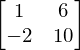

In [140]:
# Operations: addition
M = sp.Matrix([[1, 3], [-2, 3]])
N = sp.Matrix([[0, 3], [0, 7]])
M + N

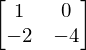

In [141]:
# Operations: subtraction
M-N

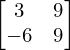

In [142]:
# Operations: scalar multiplication
M*3

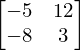

In [143]:
# Operations: power
M**2

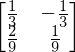

In [144]:
# Operations: inverted elements
M**-1

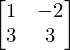

In [145]:
# Transpose
M.T

In [146]:
# Determinant
M.det()

In [147]:
# Shape
M.shape

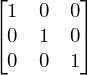

In [133]:
# Special matrix generators: eye, zeros, ones
sp.eye(3)

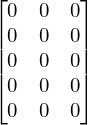

In [135]:
sp.zeros(5,3)

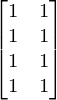

In [136]:
sp.ones(4,2)

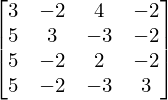

In [148]:
M = sp.Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
M

In [150]:
# Eigenvalues are returned as
# eigenvalue: algebraic multiplicity = how many times it appears as eigenvalue root
M.eigenvals()

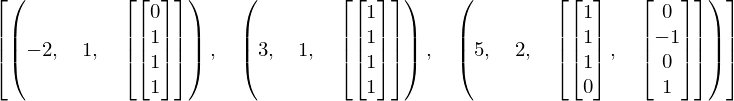

In [152]:
# Eigenvectors are returned as
# eigenvalue, algebraic multiplicity (see above), eigenvector
M.eigenvects()

## 6. Working with Equations: Solving, Plotting & Co.

Solving roots, Linear Systems, Nonlinear Systems, Plotting Functions, Solving Differential Equations.

In [154]:
# Define a function with an expression
f = x**2 - 2

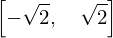

In [155]:
# Solve the roots of the function: f(x) = 0
sp.solve(f,x)

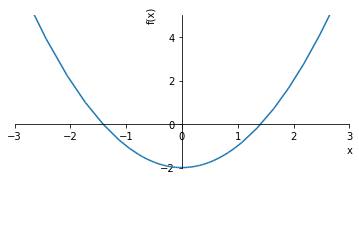

In [163]:
# Plot the function given some range limits
import matplotlib.pyplot as plt
%matplotlib inline
sp.plot(f, xlim=[-3,3], ylim=[-5,5])

In [164]:
# Solving equations: x^2 = 1
# The general interface is:
# solveset(equation, variable=None, domain=S.Complexes)
# equation can be Eq(), or a expression (which is assumed = 0)
sp.solveset(sp.Eq(x**2, 1), x)

In [165]:
# Solving equations: when no solution exists
# If no Eq() passed, expression assumed = 0
sp.solveset(sp.exp(x), x)

In [166]:
# Not able to find solutions
# If no Eq() passed, expression assumed = 0
sp.solveset(sp.cos(x) - x, x)

In [167]:
# Linear systems
sp.linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

In [170]:
# Linear systems in Ax=b form
M = sp.Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
system = A, b = M[:, :-1], M[:, -1]
sp.linsolve(system, x, y, z)

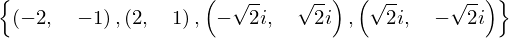

In [172]:
# Nonlinear systems
system = [x**2 - 2*y**2 -2, x*y - 2]
vars = [x, y]
sp.nonlinsolve(system, vars)

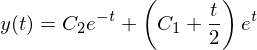

In [181]:
# Solving Differential Equations
# Equation: y'' - y = e^t; solve y(t)
y = sp.Function('y')
t = sp.symbols('t')
sp.dsolve(sp.Eq(y(t).diff(t,t) - y(t),sp.exp(t)), y(t))

In [183]:
# Another way of solving differential equations
# We can also create functions with sp.symbols() using cls=sp.Function
f, g = sp.symbols('f g', cls=sp.Function)

In [184]:
# Now, f(x) is an abstract function in x
f(x)

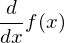

In [185]:
f(x).diff(x)

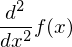

In [186]:
f(x).diff(x,x)

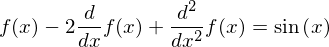

In [188]:
# Define differential equation
diffeq = sp.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sp.sin(x))
diffeq

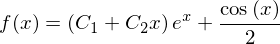

In [189]:
# Solve f(x)
sp.dsolve(diffeq, f(x))